importing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from sklearn.metrics import silhouette_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_auc_score, roc_curve,precision_recall_curve
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


Loading dataset

In [6]:
df = pd.read_csv(r"C:\Users\SK MIANUR RAHAMAN\OneDrive\Desktop\Credit Card Fraud\creditcard.csv\creditcard.csv")

No of Rows and col

In [7]:
print("Row:" ,df.shape[0],"\nColumn :",df.shape[1])

Row: 284807 
Column : 31


columns 

In [8]:
print("Columns name :", df.columns)

Columns name : Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [9]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
197383,131989.0,2.063678,-0.104887,-1.143794,0.377898,-0.086934,-1.052966,0.128561,-0.266981,0.636529,0.081598,-0.927231,0.105493,-0.479290,0.384554,0.161046,-0.091547,-0.256163,-0.837941,0.136963,-0.261552,-0.300076,-0.750795,0.334242,-0.185412,-0.311817,0.212643,-0.071505,-0.063268,1.98,0
203995,135065.0,1.105400,-2.545466,-1.029692,-0.293607,-1.502729,-0.496282,-0.042935,-0.338257,-0.112666,0.345193,-0.628409,0.506376,1.585129,-0.671010,-0.499545,0.882542,0.349953,-1.987910,0.684370,1.135772,0.133675,-0.689052,-0.070041,-0.053430,-0.638249,-0.627703,-0.081214,0.053108,552.89,0
106873,70167.0,1.146141,-0.012101,1.289788,1.341750,-0.947894,-0.188981,-0.527173,0.066592,0.828283,-0.215659,-0.718853,0.703221,0.449087,-0.441429,0.133240,0.058818,-0.271524,-0.112851,-0.215537,-0.100042,-0.055425,0.058811,-0.012330,0.407567,0.427643,-0.411042,0.074502,0.039866,12.99,0
243178,151831.0,-0.307557,0.252490,0.472553,-2.519144,0.251353,-0.808546,0.504903,-0.084814,-1.402644,0.259616,0.508389,-0.377958,0.043647,-0.010310,-1.024132,1.460501,-0.567405,-0.620389,0.155423,0.144887,0.424001,1.204074,-0.346899,-0.326732,0.021270,-0.159227,0.348835,0.198041,9.78,0
3205,2787.0,-0.402594,0.547375,1.040719,-2.068023,0.214318,-1.073380,0.986795,-0.213035,1.073889,-1.146508,-0.394026,-0.547462,-1.848496,0.428916,1.312302,-0.798101,-0.199597,-0.209078,-0.449111,-0.104957,0.069585,0.537240,-0.247069,0.035645,-0.054309,-0.804384,0.244815,-0.020547,1.00,0
232087,147037.0,-0.364509,1.013842,0.266588,-0.328803,-0.451654,-1.645663,0.534264,0.286914,-0.015302,-0.591881,-0.524458,-0.296221,-1.791703,0.825940,-0.272735,-0.208087,0.235019,-0.879106,-0.481534,-0.295824,-0.174783,-0.535632,0.257407,0.817272,-0.656378,0.096853,0.115660,0.039087,1.98,0
229909,146105.0,0.076524,0.786597,-0.138443,-0.954624,0.991442,-0.181607,0.888665,0.007744,-0.232502,-0.241269,-0.191798,0.477914,0.130502,0.241018,-1.026427,0.417639,-1.053076,0.097715,0.612651,0.009374,-0.279424,-0.656647,-0.075475,-1.104630,-0.374448,0.187769,0.241886,0.076351,3.59,0
47710,43319.0,1.235804,-0.099509,-1.599751,-0.605616,2.282858,3.021913,-0.090596,0.665334,-0.317991,-0.018266,0.010998,0.084060,-0.058829,0.644721,0.960875,0.362742,-0.744961,-0.419050,0.464490,0.126360,-0.405424,-1.478849,0.065068,0.992378,0.424151,0.148139,-0.072025,0.011893,59.95,0
141979,84542.0,-3.166574,0.163525,0.749397,-0.866222,-0.302519,1.540709,-2.898646,-4.346703,0.034292,-2.092639,-0.307799,1.068775,-1.160354,0.698697,-1.395052,0.818610,0.022491,-0.052514,-0.201367,0.641822,-2.731827,0.472995,0.152014,-0.788218,-0.279537,0.820371,-0.076887,-0.049432,59.15,0
94296,64820.0,1.339962,-1.434703,1.129090,-1.445583,-1.976242,0.174151,-1.763320,0.304786,-1.482474,1.542757,1.208146,-0.688133,-0.517972,-0.219370,0.713923,0.042401,0.358888,0.656439,-0.604197,-0.349060,0.024845,0.372484,0.061157,-0.014336,0.035232,-0.136777,0.072796,0.024082,37.00,0


dataset statistics

In [10]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Data distribution

[]

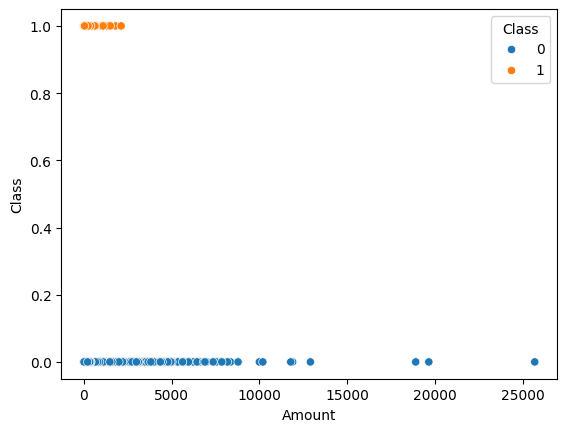

In [11]:
sns.scatterplot(data = df,x = 'Amount',y = 'Class',hue = 'Class')
plt.plot()

checking null values

In [12]:
df.isnull().sum().sum()

np.int64(0)

Imbalanced dataset

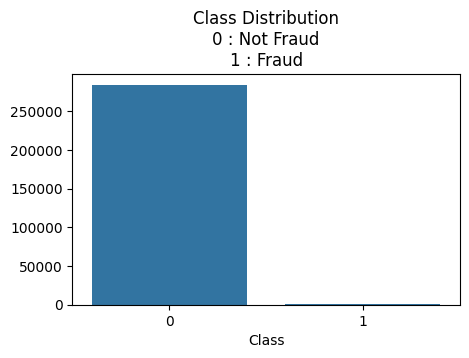

In [13]:
plt.figure(figsize=(5,3))
sns.barplot( x = df['Class'].value_counts().index,
            y = df['Class'].value_counts().values)
plt.title("Class Distribution\n0 : Not Fraud\n1 : Fraud")
plt.show()

In [14]:
print("Not Fraud :",round(df['Class'].value_counts()[0] / len(df) * 100 , 2),"%")
print("Fraud :",round(df["Class"].value_counts()[1] / len(df) * 100 , 2),"%")

Not Fraud : 99.83 %
Fraud : 0.17 %


Distribution of amount and time

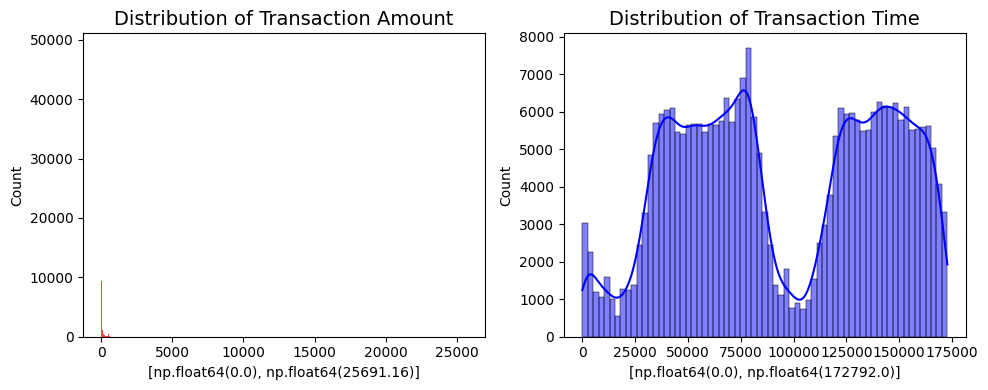

In [ ]:
amount_val = df['Amount'].values
time_val = df['Time'].values

plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
sns.histplot(amount_val, color='r',ax = ax1)
plt.title('Distribution of Transaction Amount', fontsize=14)
plt.xlabel([min(amount_val), max(amount_val)])

ax2 = plt.subplot(1,2,2)
sns.histplot(time_val, color='b',kde = True,ax = ax2)
plt.title('Distribution of Transaction Time', fontsize=14)
plt.xlabel([min(time_val), max(time_val)])



plt.tight_layout()
plt.show()

In [ ]:
'''scaled_amount = df['Scaled_amount']
scaled_time = df['Scale_time']

df.drop(['Scaled_amount','Scale_time'],axis = 1,inplace = True)
df.insert(0,'scaled_amount',scaled_amount)
df.insert(1,'Scaled_time',scaled_time)

df.head() '''

In [ ]:
'''df_fraud = df[df['Class'] == 1]
df_not_fraud = df[df['Class'] == 0]'''


In [ ]:
'''plt.figure(figsize = (5,4))

sns.distplot(df_fraud['Scaled_time'],label = 'Fraudulent',hist = False)
sns.distplot(df_not_fraud['Scaled_time'],label = 'Fraudulent',hist = False)
plt.show()'''


Checking correlation between features

In [21]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,7.388135e-17,2.125498e-16,2.053457e-16,-2.425603e-17,-5.020280e-16,3.547782e-16,7.212815e-17,-3.879840e-16,3.230206e-17,1.502024e-16,4.654551e-16,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,-3.991394e-16,1.975426e-16,-9.568710e-17,6.295388e-16,-1.730566e-16,-4.995814e-17,1.177316e-17,-2.685296e-16,3.284605e-16,-7.118719e-18,2.506675e-16,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,1.156587e-15,1.576830e-15,6.310231e-16,2.807652e-16,4.739859e-16,9.068793e-16,8.299445e-16,7.614712e-16,1.509897e-16,3.463522e-16,-9.316409e-16,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,2.232685e-16,3.459380e-16,-5.625518e-16,1.303306e-16,2.282280e-16,1.377649e-16,-9.614528e-16,-2.699612e-16,-5.103644e-16,-3.980557e-16,-1.857247e-16,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,-5.202306e-16,7.203963e-16,7.412552e-16,5.886991e-16,6.565143e-16,-8.720275e-16,2.246261e-15,1.281914e-16,5.308590e-16,-1.450421e-16,-3.554057e-16,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,5.932243e-17,1.980503e-15,2.375468e-16,-1.211182e-16,2.621312e-16,-1.531188e-15,2.623672e-18,2.015618e-16,1.223814e-16,-1.865597e-16,-1.858755e-16,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,-7.492834e-17,1.425248e-16,-3.536655e-18,1.266462e-17,2.607772e-16,-1.690540e-16,5.869302e-17,2.177192e-16,7.604126e-17,-1.881008e-16,9.379684e-16,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,-2.801370e-16,2.487043e-16,1.839891e-16,-2.921856e-16,-8.599156e-16,4.127777e-16,-5.254741e-16,-2.269549e-16,-3.667974e-16,-3.875186e-16,2.033737e-16,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,-4.642274e-16,1.354680e-16,-1.079314e-15,2.251072e-15,3.784757e-15,

Splitting training and testing data

In [22]:
X = df.iloc[:,:-1]
Y = df['Class']


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( X , Y , random_state = 42 , test_size = 0.2 , stratify = Y )

In [25]:
amount_feature = ["Amount"]
time_feature = ['Time']
preprocess = ColumnTransformer(
    transformers = [
        ('Scaled_Time',StandardScaler(),time_feature),
        ("Scaled_Amount",RobustScaler(),amount_feature)
    ],
    remainder = 'passthrough'
)

In [ ]:
xgb = XGBClassifier()

Pipeline (scaling -> balancing dataset -> training model)

In [34]:
pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("classifier", xgb)
])

hyper-parameter tuning using Grid serach CV

In [41]:
negative = sum(y_train == 0)
positive = sum(y_train == 1)
weight = negative / positive
param_grid = {
    'classifier__n_estimators': [ 500, 700, 800 ],
    'classifier__max_depth': [ 6, 7, 8, 12],
    'classifier__learning_rate': [  0.03, 0.05, 0.06 ],
    'classifier__subsample': [0.9],
    'classifier__colsample_bytree': [0.8],
    'classifier__scale_pos_weight' : [weight,50]
}
''' 'classifier__gamma': [0, 0.1, 0.2],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__reg_alpha': [0, 0.1, 0.5],
    'classifier__reg_lambda': [1, 2]' '''
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)


In [42]:
grid.fit(X_train,y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Scaled_Time',
                                                                         StandardScaler(),
                                                                         ['Time']),
                                                                        ('Scaled_Amount',
                                                                         RobustScaler(),
                                                                         ['Amount'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=No...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.8],
                         'classifier__learning_rate': [0.03, 0.05, 0.06],
                         'classifier__max_depth': [6, 7, 8, 12],
                         'classifier__n_estimators': [500, 700, 800],
                         'classifier__scale_pos_weight': [577.2868020304569,
                                                          50],
                         'classifier__subsample': [0.9]},
             scoring='roc_auc', verbose=2)

best parameters for model

In [50]:
print(grid.best_params_)
y_pred = grid.predict(X_test)
y_proba = grid.predict_proba(X_test)[:,1]


{'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 12, 'classifier__n_estimators': 700, 'classifier__scale_pos_weight': 50, 'classifier__subsample': 0.9}


precision recall curve(helps to identify threshold)

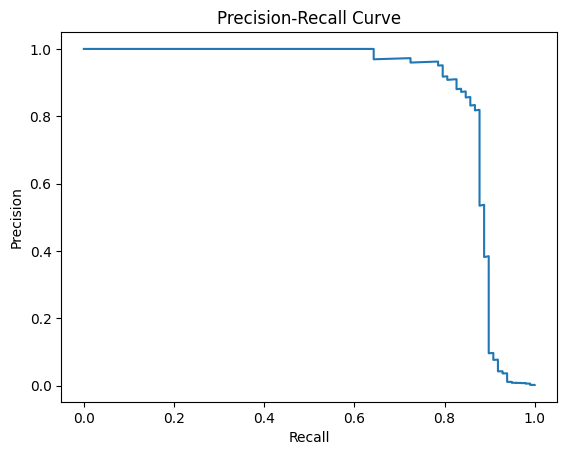

In [51]:
precision, recall, thresholds = precision_recall_curve(
    y_test, y_proba
)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


AUC ROC: 0.977923337314667


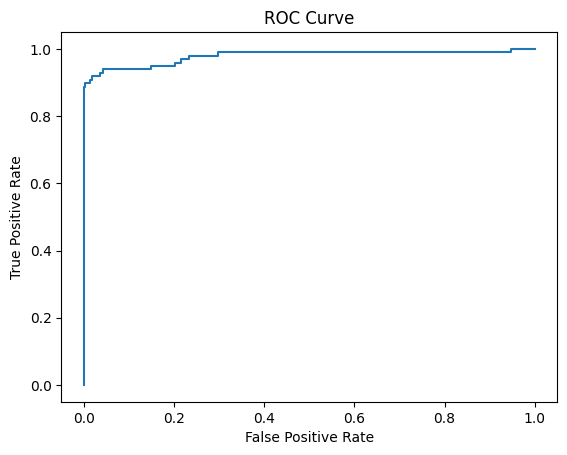

In [52]:

auc = roc_auc_score(y_test, grid.predict_proba(X_test)[:,1])
print("AUC ROC:", auc)

fpr, tpr, th = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

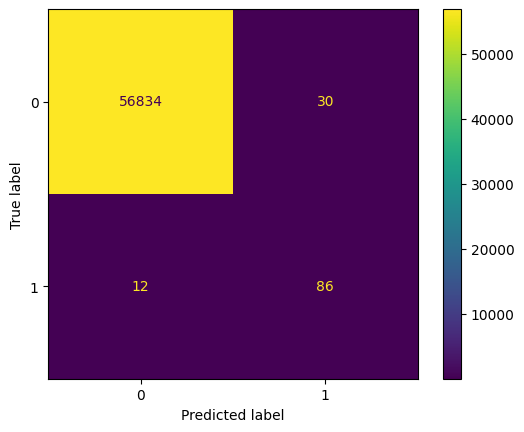

In [53]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()


[]

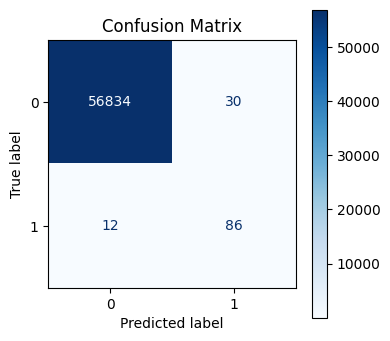

In [54]:
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap="Blues")

plt.title("Confusion Matrix")
plt.savefig("Confusion_matrix.jpg",dpi=300, bbox_inches='tight')
plt.plot()

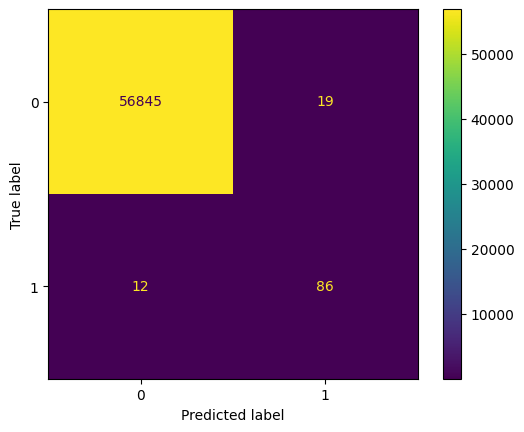

In [85]:
thresholds = 0.839  # from precision recall curve
y_pred_thres = (y_proba >= thresholds).astype(int)
cm = confusion_matrix(y_test,y_pred_thres)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

Optimal Threshold

In [80]:
thresholds = np.arange(0.1, 0.9,0.01)
scores = []

for t in thresholds:
    y_temp = (y_proba >= t).astype(int)
    scores.append(f1_score(y_test, y_temp))

best_t = thresholds[np.argmax(scores)]
best_f1 = max(scores)

print("Best Threshold:", best_t)
print("Best F1 Score:", best_f1)

Best Threshold: 0.8399999999999996
Best F1 Score: 0.8472906403940886


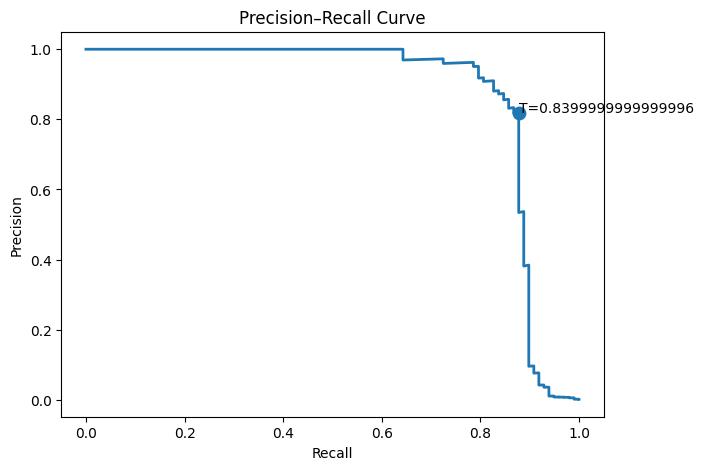

In [83]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")

# Mark your threshold on the curve
thr_idx = np.argmin(np.abs(thresholds - best_t))
plt.scatter(recall[thr_idx], precision[thr_idx], s=80)
plt.annotate(f"T={best_t}", 
             (recall[thr_idx], precision[thr_idx]))

plt.show()